In [23]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import six
sns.set(style="whitegrid", font_scale=1.3)
sns.set(rc={'figure.figsize':(10,5)})

In [27]:
results = dict()
# To load data from json
with open('./experiment_results/ofs_results.json', 'r') as fp:
    results['OFS'] = json.load(fp)
with open('./experiment_results/fsds_results.json', 'r') as fp:
    results['FSDS'] = json.load(fp)
with open('./experiment_results/mcnn_results.json', 'r') as fp:
    results['MCNN'] = json.load(fp)
with open('./experiment_results/canc_results.json', 'r') as fp:
    results['CancelOut'] = json.load(fp)

# Tables

Time: Averaged over all differen no. of selected features

In [28]:
time_table = pd.DataFrame()

for alg in results:
    
    b50_avg_har_t = 0
    b100_avg_har_t = 0
    b200_avg_har_t = 0
    b50_avg_credit_t = 0
    b100_avg_credit_t = 0
    b200_avg_credit_t = 0
    b50_avg_usenet_t = 0
    b100_avg_usenet_t = 0
    b200_avg_usenet_t = 0
    
    for i in results[alg]:        
    
        if 'har' in i:
            if '472B' in i:
                b50_avg_har_t += results[alg][i]['time_avg']
            elif '708B' in i:
                b100_avg_har_t += results[alg][i]['time_avg']
            elif '944B' in i:
                b200_avg_har_t += results[alg][i]['time_avg'] 
        elif 'credit' in i:
            if '96B' in i:
                b50_avg_credit_t += results[alg][i]['time_avg']
            elif '145B' in i:
                b100_avg_credit_t += results[alg][i]['time_avg']
            elif '193B' in i:
                b200_avg_credit_t += results[alg][i]['time_avg']
        if 'usenet' in i:
            if '593B' in i:
                b50_avg_usenet_t += results[alg][i]['time_avg']
            elif '890B' in i:
                b100_avg_usenet_t += results[alg][i]['time_avg']
            elif '1186B' in i:
                b200_avg_usenet_t += results[alg][i]['time_avg']
    
    time_table.loc[alg,'HAR b=472'] = round(b50_avg_har_t / 3, 2)
    time_table.loc[alg,'HAR b=708'] = round(b100_avg_har_t / 3, 2)
    time_table.loc[alg,'HAR b=944'] = round(b200_avg_har_t / 3, 2)
    time_table.loc[alg,'Credit b=96'] = round(b50_avg_credit_t / 3, 2)
    time_table.loc[alg,'Credit b=145'] = round(b100_avg_credit_t / 3, 2)
    time_table.loc[alg,'Credit b=193'] = round(b200_avg_credit_t / 3, 2)
    time_table.loc[alg,'Usenet b=593'] = round(b50_avg_usenet_t / 3, 2)
    time_table.loc[alg,'Usenet b=890'] = round(b100_avg_usenet_t / 3, 2)
    time_table.loc[alg,'Usenet b=1186'] = round(b200_avg_usenet_t / 3, 2)

In [29]:
time_table

,HAR b=472,HAR b=708,HAR b=944,Credit b=96,Credit b=145,Credit b=193,Usenet b=593,Usenet b=890,Usenet b=1186
OFS,246.54,384.04,451.09,4.42,6.96,10.25,540.42,822.79,1009.41
FSDS,40.67,55.35,66.09,0.40,0.45,0.58,45.11,77.34,93.56
MCNN,63592.67,98198.54,117785.53,45.58,56.77,85.68,13821.72,22045.59,27055.26
CancelOut,3002.00,5047.46,6977.51,42.33,67.45,71.46,3199.79,5411.71,6587.69


In [30]:
def render_mpl_table(data, col_width=2.0, row_height=0.625, font_size=14,
                     header_color='#2c2c2c', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

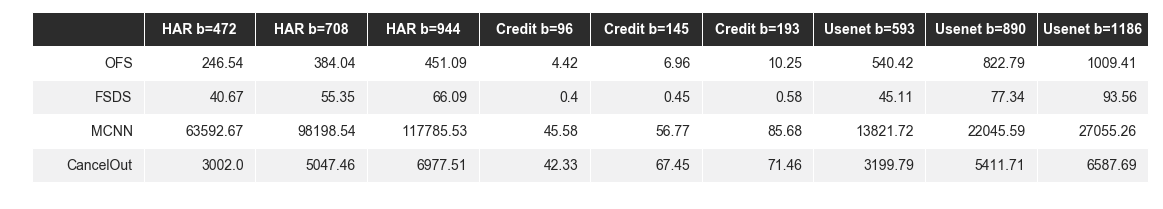

In [31]:
# Plot time table and save to image
df = time_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/time_measures')

Accuracy & FCR: averaged over all different batch sizes

In [34]:
acc_table = pd.DataFrame()
fscr_table = pd.DataFrame()

for alg in results:

    f5_avg_har_a = 0
    f10_avg_har_a = 0
    f20_avg_har_a = 0
    f5_avg_credit_a = 0
    f10_avg_credit_a = 0
    f20_avg_credit_a = 0
    f5_avg_usenet_a = 0
    f10_avg_usenet_a = 0
    f20_avg_usenet_a = 0
    
    f5_avg_har_f = 0
    f10_avg_har_f = 0
    f20_avg_har_f = 0
    f5_avg_credit_f = 0
    f10_avg_credit_f = 0
    f20_avg_credit_f = 0
    f5_avg_usenet_f = 0
    f10_avg_usenet_f = 0
    f20_avg_usenet_f = 0
    
    for i in results[alg]:        
    
        if 'har' in i:
            if '5F' in i:
                f5_avg_har_a += results[alg][i]['acc_avg']
                f5_avg_har_f += results[alg][i]['fscr_avg']
            elif '10F' in i:
                f10_avg_har_a += results[alg][i]['acc_avg']
                f10_avg_har_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_har_a += results[alg][i]['acc_avg']
                f20_avg_har_f += results[alg][i]['fscr_avg']
        elif 'credit' in i:
            if '5F' in i:
                f5_avg_credit_a += results[alg][i]['acc_avg']
                f5_avg_credit_f += results[alg][i]['fscr_avg']
            elif '10F' in i:
                f10_avg_credit_a += results[alg][i]['acc_avg']
                f10_avg_credit_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_credit_a += results[alg][i]['acc_avg']
                f20_avg_credit_f += results[alg][i]['fscr_avg']
        if 'usenet' in i:
            if '5F' in i:
                f5_avg_usenet_a += results[alg][i]['acc_avg']
                f5_avg_usenet_f += results[alg][i]['fscr_avg']                
            elif '10F' in i:
                f10_avg_usenet_a += results[alg][i]['acc_avg']
                f10_avg_usenet_f += results[alg][i]['fscr_avg']
            elif '20F' in i:
                f20_avg_usenet_a += results[alg][i]['acc_avg']
                f20_avg_usenet_f += results[alg][i]['fscr_avg']
    
    acc_table.loc[alg,'HAR m=5'] = round(f5_avg_har_a / 3, 2)
    acc_table.loc[alg,'HAR m=10'] = round(f10_avg_har_a / 3, 2)
    acc_table.loc[alg,'HAR m=20'] = round(f20_avg_har_a / 3, 2)
    acc_table.loc[alg,'Credit m=5'] = round(f5_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Credit m=10'] = round(f10_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Credit m=20'] = round(f20_avg_credit_a / 3, 2)
    acc_table.loc[alg,'Usenet m=5'] = round(f5_avg_usenet_a / 3, 2)
    acc_table.loc[alg,'Usenet m=10'] = round(f10_avg_usenet_a / 3, 2)
    acc_table.loc[alg,'Usenet m=20'] = round(f20_avg_usenet_a / 3, 2)
    
    fscr_table.loc[alg,'HAR m=5'] = round(f5_avg_har_f / 3, 2)
    fscr_table.loc[alg,'HAR m=10'] = round(f10_avg_har_f / 3, 2)
    fscr_table.loc[alg,'HAR m=20'] = round(f20_avg_har_f / 3, 2)
    fscr_table.loc[alg,'Credit m=5'] = round(f5_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Credit m=10'] = round(f10_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Credit m=20'] = round(f20_avg_credit_f / 3, 2)
    fscr_table.loc[alg,'Usenet m=5'] = round(f5_avg_usenet_f / 3, 2)
    fscr_table.loc[alg,'Usenet m=10'] = round(f10_avg_usenet_f / 3, 2)
    fscr_table.loc[alg,'Usenet m=20'] = round(f20_avg_usenet_f / 3, 2)

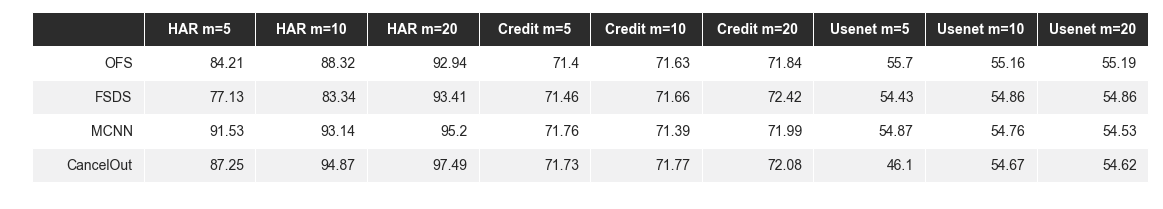

In [35]:
# Plot time table and save to image
df = acc_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/acc_measures')

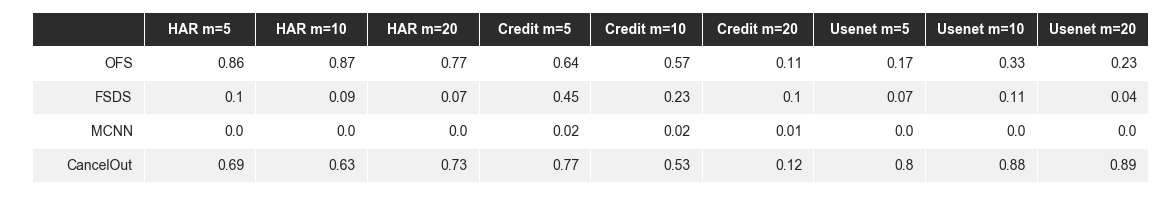

In [36]:
# Plot fscr table and save to image
df = fscr_table.reset_index() 
df.rename(index=str, columns={'index': ''}, inplace=True)
render_mpl_table(df, header_columns=0, col_width=2.0)

plt.savefig('./experiment_results/figures/fscr_measures')

# Plots

## Accuracy

In [37]:
avg_acc_measures =dict()
batch_size = ['472B','96B','593B']

for alg in results:
    avg_acc_har = np.array([])
    avg_acc_credit = np.array([])
    avg_acc_usenet = np.array([])
    
    
    for key, val in results[alg].items():
        if 'har' in key and batch_size[0] in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_har) == 0:
                avg_acc_har = acc
            else:
                avg_acc_har += acc
                
        if 'credit' in key and batch_size[1] in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_credit) == 0:
                avg_acc_credit = acc
            else:
                avg_acc_credit += acc
                
        if 'usenet' in key and batch_size[2] in key:
            acc = np.array(val['acc_measures'])
            
            if len(avg_acc_usenet) == 0:
                avg_acc_usenet = acc
            else:
                avg_acc_usenet += acc
                
    avg_acc_measures[alg+';har;'+batch_size[0]] = avg_acc_har / 3
    avg_acc_measures[alg+';credit;'+batch_size[1]] = avg_acc_credit / 3
    avg_acc_measures[alg+';usenet;'+batch_size[2]] = avg_acc_usenet / 3

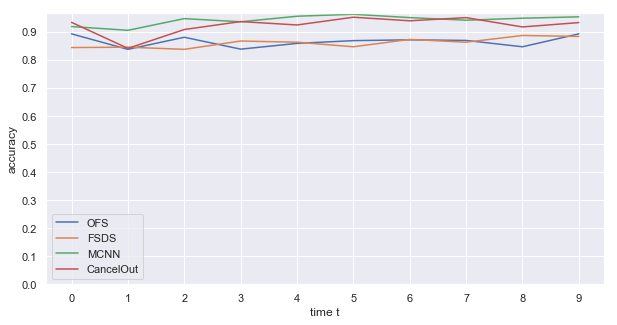

In [69]:
# Avg. Accuracy for Credit data with given batch size
for alg in results:
    plt.plot(avg_acc_measures[alg+';har;'+batch_size[0]][:-1], label=alg)

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, len(avg_acc_measures[alg+';har;'+batch_size[0]])-1, 1))
plt.ylabel('accuracy')
plt.xlabel('time t')
plt.legend(loc='best')

plt.savefig('./experiment_results/figures/acc_har_'+batch_size[0])

## FSCR

In [44]:
avg_fscr_measures =dict()
batch_size = ['472B','96B','593B']

for alg in results:
    avg_fscr_har = np.array([])
    avg_fscr_credit = np.array([])
    avg_fscr_usenet = np.array([])
    
    
    for key, val in results[alg].items():
        if 'har' in key and batch_size[0] in key:
            fscr = np.array(val['fscr_measures'])
            
            if len(avg_fscr_har) == 0:
                avg_fscr_har = fscr
            else:
                avg_fscr_har += fscr
                
        if 'credit' in key and batch_size[1] in key:
            fscr = np.array(val['fscr_measures'])
            
            if len(avg_fscr_credit) == 0:
                avg_fscr_credit = fscr
            else:
                avg_fscr_credit += fscr
                
        if 'usenet' in key and batch_size[2] in key:
            acc = np.array(val['fscr_measures'])
            
            if len(avg_fscr_usenet) == 0:
                avg_fscr_usenet = fscr
            else:
                avg_fscr_usenet += fscr
                
    avg_fscr_measures[alg+';har;'+batch_size[0]] = avg_fscr_har / 3
    avg_fscr_measures[alg+';credit;'+batch_size[1]] = avg_fscr_credit / 3
    avg_fscr_measures[alg+';usenet;'+batch_size[2]] = avg_fscr_usenet / 3

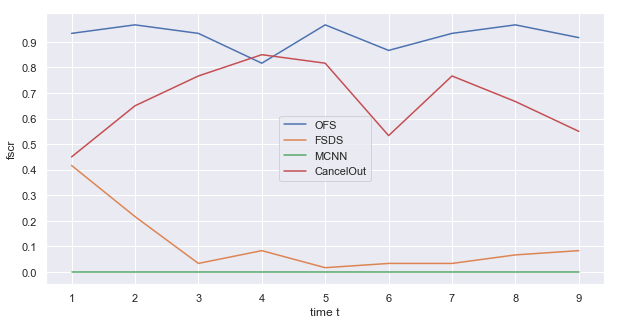

In [67]:
# Avg. Feature Selection Change Rate for Credit data with given batch size
for alg in results:
    plt.plot(avg_fscr_measures[alg+';har;'+batch_size[0]][:-1], label=alg)

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, len(avg_fscr_measures[alg+';har;'+batch_size[0]])-1, 1), np.arange(1, len(avg_fscr_measures[alg+';har;'+batch_size[0]]), 1))
plt.ylabel('fscr')
plt.xlabel('time t')
plt.legend(loc='best')

plt.savefig('./experiment_results/figures/fscr_har_'+batch_size[0])